In [8]:
import numpy as np
from scipy.optimize import minimize
from scipy.io import loadmat
from numpy.linalg import det, inv
from math import sqrt, pi
import scipy.io
import matplotlib.pyplot as plt
import pickle
import sys
from scipy.stats import multivariate_normal

Problem 2:
LDA Accuracy = 0.97
QDA Accuracy = 0.96


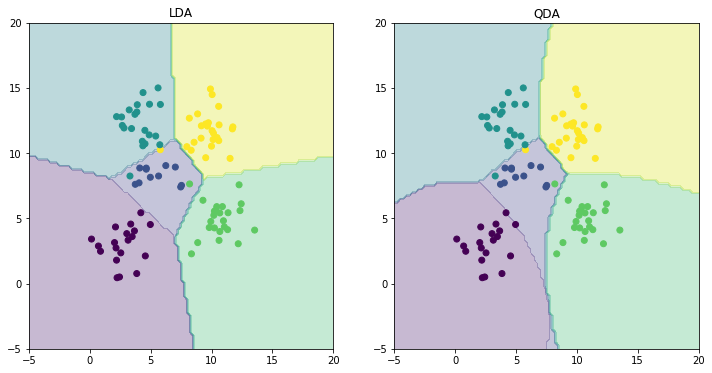

Problem 2:
MLE_train [[ 19099.44684457]]
MLE_i_train [[ 2187.16029493]]
MSE without intercept [[ 106775.36153269]]
MSE with intercept [[ 3707.8401812]]
Problem 3:
Lambdas 1.0
Optimal Lambd 0.06
Minimum mse [ 2851.33021344]


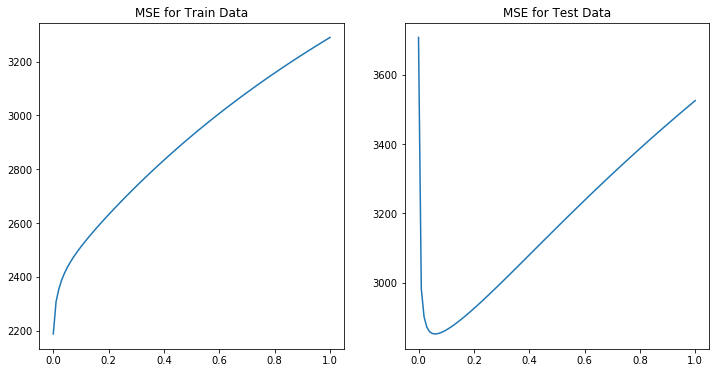

Problem 4:
[ 2900.54637993]
[ 2874.34231758]
[ 2839.23621074]
[ 2832.8295137]
[ 2848.34012385]
[ 2836.18984218]
[ 2852.36699814]
[ 2846.45125755]
[ 2857.56920985]
[ 2851.86517216]
[ 2892.29927367]
[ 2871.12665533]
[ 2876.27801344]
[ 2881.72446824]
[ 2887.58672293]
[ 2890.82759535]
[ 2895.1951695]
[ 2902.82260021]
[ 2915.57219473]
[ 2920.66979737]
[ 2925.38578596]
[ 2934.50156381]
[ 2938.95345202]
[ 2946.95231818]
[ 2953.62338037]
[ 2961.3777955]
[ 2970.50751556]
[ 2977.250455]
[ 2984.19947634]
[ 2991.0469395]
[ 3000.33597295]
[ 3006.63151212]
[ 3015.86579]
[ 3023.96155765]
[ 3031.13153064]
[ 3039.80379504]
[ 3047.69819731]
[ 3055.25303834]
[ 3063.6683601]
[ 3071.07646514]
[ 3079.10062871]
[ 3087.40019835]
[ 3094.88300931]
[ 3103.3003284]
[ 3111.35563688]
[ 3119.36110001]
[ 3127.29723791]
[ 3134.6005935]
[ 3142.19270012]
[ 3151.14479824]
[ 3158.59098328]
[ 3166.91314824]
[ 3174.84926369]
[ 3182.43501605]
[ 3190.51460721]
[ 3198.40321771]
[ 3206.06456666]
[ 3213.81235872]
[ 3221.7844574]

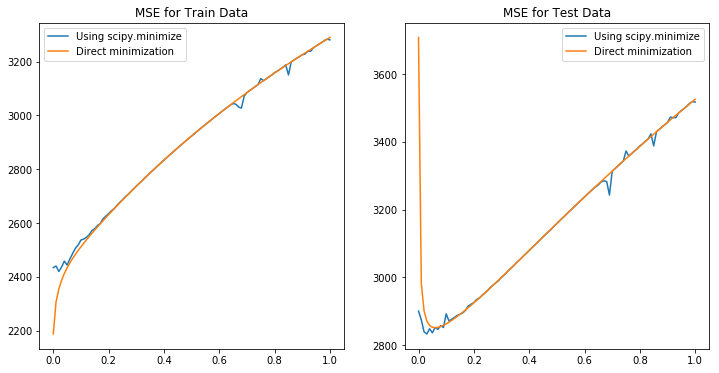

Problem 5:
Minmse1 3845.03473017
Minmse2 3895.58266828
Minmse3 3866.88344945
Minmse4 3950.68233514
P1 1
P2 4
P3 6
P4 6


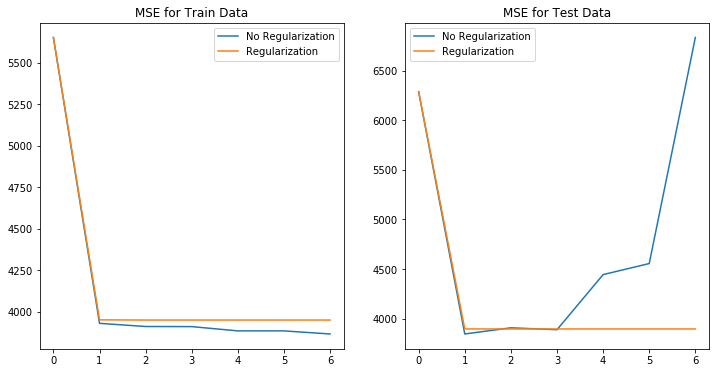

In [16]:
import numpy as np
from scipy.optimize import minimize
from scipy.io import loadmat
from numpy.linalg import det, inv
from math import sqrt, pi
import scipy.io
import matplotlib.pyplot as plt
import pickle
import sys
from scipy.stats import multivariate_normal
def find_covariance(input_mat,mean,pool_cov_base): # function to find covariance for each class
    first=input_mat-mean
    second=first.transpose()
    third=np.matmul(second,first)
    fourth=((input_mat.size)/2)-1
    pool_cov_base=pool_cov_base+fourth
    final=third
    return final,pool_cov_base
def find_mean(input_mat):  # function to find mean for each class
    input_mat=np.array(input_mat)
    rows=(input_mat.size)/2
    input_mat=np.reshape(input_mat,(int(rows),2))
    mean=input_mat.mean(0)
    mean=mean.flatten()
    mean=np.reshape(mean,(1,2))
    return input_mat,mean
def find_pool_covariance(c1,c2,c3,c4,c5,pool_cov_base): # function to find pool variance
    pool_cov=c1+c2+c3+c4+c5
    pool_cov_base=Xtest.size/2
    pool_cov_base=pool_cov_base-5
    pool_cov=pool_cov/pool_cov_base
    return pool_cov
def find_qda_covariance(input_mat,mean,pool_cov_base): # function to find covariance for each class
    first=input_mat-mean
    second=first.transpose()
    third=np.matmul(second,first)
    fourth=((input_mat.size)/2)-1
    pool_cov_base=pool_cov_base+fourth
    final=third/fourth
    return final,pool_cov_base
def ldaLearn(X,y):
    # Inputs
    # X - a N x d matrix with each row corresponding to a training example
    # y - a N x 1 column vector indicating the labels for each training example
    #
    # Outputs
    # means - A d x k matrix containing learnt means for each of the k classes
    # covmat - A single d x d learnt covariance matrix 
    
    # IMPLEMENT THIS METHOD 
    index=0
    mat1=[]
    mat2=[]
    mat3=[]
    mat4=[]
    mat5=[]
    while(index<y.size):
        if y[index] == 1:
            mat1.append(X[index])
        if y[index] == 2:
            mat2.append(X[index])
        if y[index] == 3:
            mat3.append(X[index])
        if y[index] == 4:
            mat4.append(X[index])
        if y[index] == 5:
            mat5.append(X[index])
        index=index+1
    pool_cov_base=0;
    mat1,mean1=find_mean(mat1)
    cov1,pool_cov_base=find_covariance(mat1,mean1,pool_cov_base)
    mat2,mean2=find_mean(mat2)
    cov2,pool_cov_base=find_covariance(mat2,mean2,pool_cov_base)

    mat3,mean3=find_mean(mat3)
    cov3,pool_cov_base=find_covariance(mat3,mean3,pool_cov_base)

    mat4,mean4=find_mean(mat4)
    cov4,pool_cov_base=find_covariance(mat4,mean4,pool_cov_base)

    mat5,mean5=find_mean(mat5)
    cov5,pool_cov_base=find_covariance(mat5,mean5,pool_cov_base)

    means=[]
    means.append(mean1)
    means.append(mean2)
    means.append(mean3)
    means.append(mean4)
    means.append(mean5)
    means=np.array(means)
    means=np.asmatrix(means)
    means=means.transpose()
    total_class=5;
    pool_cov_base=(X.size/2)-total_class;
    covmat=find_pool_covariance(cov1,cov2,cov3,cov4,cov5,pool_cov_base)
    return means,covmat
def qdaLearn(X,y):
    # Inputs
    # X - a N x d matrix with each row corresponding to a training example
    # y - a N x 1 column vector indicating the labels for each training example
    #
    # Outputs
    # means - A d x k matrix containing learnt means for each of the k classes
    # covmats - A list of k d x d learnt covariance matrices for each of the k classes
    
    # IMPLEMENT THIS METHOD
    index=0
    mat1=[]
    mat2=[]
    mat3=[]
    mat4=[]
    mat5=[]
    while(index<y.size):
        if y[index] == 1:
            mat1.append(X[index])
        if y[index] == 2:
            mat2.append(X[index])
        if y[index] == 3:
            mat3.append(X[index])
        if y[index] == 4:
            mat4.append(X[index])
        if y[index] == 5:
            mat5.append(X[index])
        index=index+1
    pool_cov_base=0
    mat1,mean1=find_mean(mat1)
    cov1,pool_cov_base=find_qda_covariance(mat1,mean1,pool_cov_base)

    mat2,mean2=find_mean(mat2)
    cov2,pool_cov_base=find_qda_covariance(mat2,mean2,pool_cov_base)

    mat3,mean3=find_mean(mat3)
    cov3,pool_cov_base=find_qda_covariance(mat3,mean3,pool_cov_base)

    mat4,mean4=find_mean(mat4)
    cov4,pool_cov_base=find_qda_covariance(mat4,mean4,pool_cov_base)

    mat5,mean5=find_mean(mat5)
    cov5,pool_cov_base=find_qda_covariance(mat5,mean5,pool_cov_base)

    means=[]
    means.append(mean1)
    means.append(mean2)
    means.append(mean3)
    means.append(mean4)
    means.append(mean5)
    means=np.array(means)
    means=np.asmatrix(means)
    means=means.transpose()
    covmats=[]
    covmats.append(cov1)
    covmats.append(cov2)
    covmats.append(cov3)
    covmats.append(cov4)
    covmats.append(cov5)
    return means,covmats
def ldaTest(means,covmat,Xtest,ytest):
    # Inputs
    # means, covmat - parameters of the LDA model
    # Xtest - a N x d matrix with each row corresponding to a test example
    # ytest - a N x 1 column vector indicating the labels for each test example
    # Outputs
    # acc - A scalar accuracy value
    # ypred - N x 1 column vector indicating the predicted labels

    # IMPLEMENT THIS METHOD
    means=means.transpose()
    index=0
    index2=0
    pdf=0;
    classifier=0
    total_wrong_labels=0;
    ypred=[]
    while(index<ytest.size):
        x_i=Xtest[index]
        index2=0
        classifier=0
        pdf=0
        while(index2<(means.size)/2):
            class_mean=means[index2]
            class_mean=np.array(class_mean)
            class_mean=class_mean.flatten()
            pdf_i=multivariate_normal.pdf(x_i, class_mean, covmat)    
            if(pdf_i>=pdf):
                pdf=pdf_i
                classifier=index2
            index2=index2+1
        label=classifier+1
        if label != ytest[index]:
            total_wrong_labels = total_wrong_labels+1
        index=index+1
        ypred.append(label)
    acc=(ytest.size-total_wrong_labels)/ytest.size
    ypred=np.array(ypred)
    ypred=np.asmatrix(ypred)
    ypred=ypred.transpose()
    return acc,ypred

def qdaTest(means,covmats,Xtest,ytest):
    # Inputs
    # means, covmats - parameters of the QDA model
    # Xtest - a N x d matrix with each row corresponding to a test example
    # ytest - a N x 1 column vector indicating the labels for each test example
    # Outputs
    # acc - A scalar accuracy value
    # ypred - N x 1 column vector indicating the predicted labels

    # IMPLEMENT THIS METHOD
    means=means.transpose()
    index=0
    index2=0
    pdf=0;
    classifier=0
    total_wrong_labels=0;
    ypred=[]
    while(index<ytest.size):
        x_i=Xtest[index]
        index2=0
        classifier=0
        pdf=0
        while(index2<(means.size)/2):
            class_mean=means[index2]
            class_mean=np.array(class_mean)
            class_mean=class_mean.flatten()
            pdf_i=multivariate_normal.pdf(x_i, class_mean, covmats[index2])    
            if(pdf_i>=pdf):
                pdf=pdf_i
                classifier=index2
            index2=index2+1
        label=classifier+1
        if label != ytest[index]:
            total_wrong_labels = total_wrong_labels+1
        index=index+1
        ypred.append(label)
    acc=(ytest.size-total_wrong_labels)/ytest.size
    ypred=np.array(ypred)
    ypred=np.asmatrix(ypred)
    ypred=ypred.transpose()
    return acc,ypred

def learnOLERegression(X,y):
    # Inputs:                                                         
    # X = N x d 
    # y = N x 1                                                               
    # Output: 
    # w = d x 1 
    
    # IMPLEMENT THIS METHOD                                                   
    x=X
    x_t = x.transpose()
    first_step = np.matmul(x_t,x) # multiplying x transpose and x
    second_step = inv(first_step) # taking inverse of first step
    third_step = np.matmul(second_step,x_t) # multiplying second step and x transpose
    final_step = np.matmul(third_step,y) # multiplying third step and y(output of training dataset)
    w = final_step
    return w

def learnRidgeRegression(X,y,lambd):
    # Inputs:
    # X = N x d                                                               
    # y = N x 1 
    # lambd = ridge parameter (scalar)
    # Output:                                                                  
    # w = d x 1                                                                

    # IMPLEMENT THIS METHOD 
    X_mat=np.asmatrix(X) #Make X a matrix
#    print("LR:",X_mat)
    X_transpose = X_mat.transpose() #Transpose of X
    i_mat=np.identity(X_mat.shape[1]) #Define Indentity matrix of d
    first=lambd*i_mat
    second=np.matmul(X_transpose,X_mat)
    third=first+second
    fourth=inv(third)
    fifth=np.matmul(fourth,X_transpose)
    final=np.matmul(fifth,y) 
    w=final                                                 
    return w

def testOLERegression(w,Xtest,ytest):
    # Inputs:
    # w = d x 1
    # Xtest = N x d
    # ytest = X x 1
    # Output:
    # mse
    
    # IMPLEMENT THIS METHOD
    x_test=Xtest
    y_test=ytest
    N=y_test.size
    first=np.matmul(x_test,w)
    second=np.subtract(y_test,first)
    third=second.transpose()
    fourth=np.matmul(third,second)
    mse=fourth/N
    
    return mse

def regressionObjVal(w, X, y, lambd):

    # compute squared error (scalar) and gradient of squared error with respect
    # to w (vector) for the given data X and y and the regularization parameter
    # lambda                                                                  

    # IMPLEMENT THIS METHOD  
    w = w.reshape(-1,1) #resize w
    w_transpose = w.transpose()
    x_transpose = X.transpose()
    a = np.dot(X,w)
    b = (y - a)
    first = np.dot(np.transpose(b),b)
    second = lambd * np.dot(w_transpose,w)
    error = (first + second)/2 #squared error
    c = np.dot(x_transpose,X)
    d = np.dot(x_transpose,y)
    third = np.dot(c,w)
    error_grad = third - d + lambd*w #gradient of squared error
    error_grad = error_grad.flatten() #To align the shape
    
    return error, error_grad                                          

def mapNonLinear(x,p):
    # Inputs:                                                                  
    # x - a single column vector (N x 1)                                       
    # p - integer (>= 0)                                                       
    # Outputs:                                                                 
    # Xp - (N x (p+1)) 
    
    # IMPLEMENT THIS METHOD
    #Xp=(np.power(x,p))
    #Xp = np.asmatrix(Xp)
    #Xp=Xp.transpose()
    
    Xp = np.ones((x.shape[0], p+1)) #set size of Xp to be (N X (p+1))
    for index in range(p+1):
      Xp[:, index] = np.power(x,index)
    return Xp

# Main script

# Problem 1
print('Problem 2:')
# load the sample data                                                                 
if sys.version_info.major == 2:
    X,y,Xtest,ytest = pickle.load(open('sample.pickle','rb'))
else:
    X,y,Xtest,ytest = pickle.load(open('sample.pickle','rb'),encoding = 'latin1')

# # LDA
means,covmat = ldaLearn(X,y)
ldaacc,ldares = ldaTest(means,covmat,Xtest,ytest)
print('LDA Accuracy = '+str(ldaacc))
# QDA
means,covmats = qdaLearn(X,y)
qdaacc,qdares = qdaTest(means,covmats,Xtest,ytest)
print('QDA Accuracy = '+str(qdaacc))

# # plotting boundaries
x1 = np.linspace(-5,20,100)
x2 = np.linspace(-5,20,100)
xx1,xx2 = np.meshgrid(x1,x2)
xx = np.zeros((x1.shape[0]*x2.shape[0],2))
xx[:,0] = xx1.ravel()
xx[:,1] = xx2.ravel()

fig = plt.figure(figsize=[12,6])
plt.subplot(1, 2, 1)

zacc,zldares = ldaTest(means,covmat,xx,np.zeros((xx.shape[0],1)))
plt.contourf(x1,x2,zldares.reshape((x1.shape[0],x2.shape[0])),alpha=0.3)
plt.scatter(Xtest[:,0],Xtest[:,1],c=ytest.flatten())
plt.title('LDA')

plt.subplot(1, 2, 2)

zacc,zqdares = qdaTest(means,covmats,xx,np.zeros((xx.shape[0],1)))
plt.contourf(x1,x2,zqdares.reshape((x1.shape[0],x2.shape[0])),alpha=0.3)
plt.scatter(Xtest[:,0],Xtest[:,1],c=ytest.flatten())
plt.title('QDA')
plt.show()
# Problem 2
print('Problem 2:')
if sys.version_info.major == 2:
    X,y,Xtest,ytest = pickle.load(open('diabetes.pickle','rb'))
else:
    X,y,Xtest,ytest = pickle.load(open('diabetes.pickle','rb'),encoding = 'latin1')

# add intercept
X_i = np.concatenate((np.ones((X.shape[0],1)), X), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

w = learnOLERegression(X,y)
mle = testOLERegression(w,Xtest,ytest)
mle_train = testOLERegression(w,X,y)
print("MLE_train",mle_train)
w_i = learnOLERegression(X_i,y)
mle_i = testOLERegression(w_i,Xtest_i,ytest)
mle_i_train = testOLERegression(w_i,X_i,y)
print("MLE_i_train",mle_i_train)
print('MSE without intercept '+str(mle))
print('MSE with intercept '+str(mle_i))

# # Problem 3
print('Problem 3:')
k = 101
lambdas = np.linspace(0, 1, num=k)
i = 0
mses3_train = np.zeros((k,1))
mses3 = np.zeros((k,1))
min_mse=0
for lambd in lambdas:
    w_l = learnRidgeRegression(X_i,y,lambd)
    mses3_train[i] = testOLERegression(w_l,X_i,y)
    mses3[i] = testOLERegression(w_l,Xtest_i,ytest)
    if i==0:
        min_mse=mses3[i]
    if mses3[i] < min_mse:
        min_mse=mses3[i]
        opt_lambd=lambd
    i = i + 1

print("Lambdas",lambd)
print("Optimal Lambd",opt_lambd)
print("Minimum mse",min_mse)
fig = plt.figure(figsize=[12,6])
plt.subplot(1, 2, 1)
plt.plot(lambdas,mses3_train)
plt.title('MSE for Train Data')
plt.subplot(1, 2, 2)
plt.plot(lambdas,mses3)
plt.title('MSE for Test Data')
plt.show()

# # Problem 4
print('Problem 4:')
k = 101
lambdas = np.linspace(0, 1, num=k)
i = 0
mses4_train = np.zeros((k,1))
mses4 = np.zeros((k,1))
opts = {'maxiter' : 20}    # Preferred value.                                                
w_init = np.ones((X_i.shape[1],1))
for lambd in lambdas:
    args = (X_i, y, lambd)
    w_l = minimize(regressionObjVal, w_init, jac=True, args=args,method='CG', options=opts)
    w_l = np.transpose(np.array(w_l.x))
    w_l = np.reshape(w_l,[len(w_l),1])
    mses4_train[i] = testOLERegression(w_l,X_i,y)
    mses4[i] = testOLERegression(w_l,Xtest_i,ytest)
    print(mses4[i])
    if i==0:
        min__gr_mse=mses4[i]
    if mses4[i] < min__gr_mse:
        min__gr_mse=mses4[i]
        opt_gr_lambd=lambd
    i = i + 1

print("Min_gr_mse",min__gr_mse)
print("opt_gr_lambd",opt_gr_lambd)
fig = plt.figure(figsize=[12,6])
plt.subplot(1, 2, 1)
plt.plot(lambdas,mses4_train)
plt.plot(lambdas,mses3_train)
plt.title('MSE for Train Data')
plt.legend(['Using scipy.minimize','Direct minimization'])

plt.subplot(1, 2, 2)
plt.plot(lambdas,mses4)
plt.plot(lambdas,mses3)
plt.title('MSE for Test Data')
plt.legend(['Using scipy.minimize','Direct minimization'])
plt.show()


 # Problem 5
print('Problem 5:')
pmax = 7
lambda_opt = 0.06 # REPLACE THIS WITH lambda_opt estimated from Problem 3
mses5_train = np.zeros((pmax,2))
mses5 = np.zeros((pmax,2))
i=0
min_mse1=0
min_mse2=0
min_mse3=0
min_mse4=0
for p in range(pmax):
 Xd = mapNonLinear(X[:,2],p)
 Xdtest = mapNonLinear(Xtest[:,2],p)
 w_d1 = learnRidgeRegression(Xd,y,0)
 mses5_train[p,0] = testOLERegression(w_d1,Xd,y)
 mses5[p,0] = testOLERegression(w_d1,Xdtest,ytest)  
 w_d2 = learnRidgeRegression(Xd,y,lambda_opt)
 mses5_train[p,1] = testOLERegression(w_d2,Xd,y)
 mses5[p,1] = testOLERegression(w_d2,Xdtest,ytest)
 if i==0:
        min_mse1=mses5[p,0]
        min_mse2=mses5[p,1]
        min_mse3=mses5_train[p,0]
        min_mse4=mses5_train[p,1]
 if mses5[p,0]<min_mse1:
    min_mse1=mses5[p,0]
    p1=p        
 if mses5[p,1]<min_mse2:
    min_mse2=mses5[p,1]
    p2=p
 if mses5_train[p,0]<min_mse3:
    min_mse3=mses5_train[p,0]
    p3=p  
 if mses5_train[p,1]<min_mse4:
    min_mse4=mses5_train[p,1]
    p4=p  
 
 i=i+1  
print("Minmse1",min_mse1)
print("Minmse2",min_mse2)
print("Minmse3",min_mse3)
print("Minmse4",min_mse4)

print("P1",p1)
print("P2",p2)
print("P3",p3)
print("P4",p4)
fig = plt.figure(figsize=[12,6])
plt.subplot(1, 2, 1)
plt.plot(range(pmax),mses5_train)
plt.title('MSE for Train Data')
plt.legend(('No Regularization','Regularization'))
plt.subplot(1, 2, 2)
plt.plot(range(pmax),mses5)
plt.title('MSE for Test Data')
plt.legend(('No Regularization','Regularization'))
plt.show()


LDA Accuracy = 0.97
QDA Accuracy = 0.96


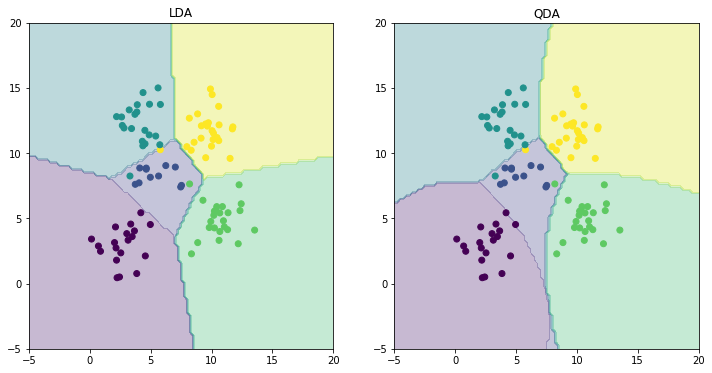

In [7]:
if sys.version_info.major == 2:
    X,y,Xtest,ytest = pickle.load(open('sample.pickle','rb'))
else:
    X,y,Xtest,ytest = pickle.load(open('sample.pickle','rb'),encoding = 'latin1')

def find_covariance(input_mat,mean,pool_cov_base): # function to find covariance for each class
    first=input_mat-mean
    second=first.transpose()
    third=np.matmul(second,first)
    fourth=((input_mat.size)/2)-1
    pool_cov_base=pool_cov_base+fourth
    final=third
    return final,pool_cov_base
def find_mean(input_mat):  # function to find mean for each class
    input_mat=np.array(input_mat)
    rows=(input_mat.size)/2
    input_mat=np.reshape(input_mat,(int(rows),2))
    mean=input_mat.mean(0)
    mean=mean.flatten()
    mean=np.reshape(mean,(1,2))
    return input_mat,mean
def find_pool_covariance(c1,c2,c3,c4,c5,pool_cov_base): # function to find pool variance
    pool_cov=c1+c2+c3+c4+c5
    pool_cov_base=Xtest.size/2
    pool_cov_base=pool_cov_base-5
    pool_cov=pool_cov/pool_cov_base
    return pool_cov
def find_qda_covariance(input_mat,mean,pool_cov_base): # function to find covariance for each class
    first=input_mat-mean
    second=first.transpose()
    third=np.matmul(second,first)
    fourth=((input_mat.size)/2)-1
    pool_cov_base=pool_cov_base+fourth
    final=third/fourth
    return final,pool_cov_base
def ldaLearn(X,y):
    # Inputs
    # X - a N x d matrix with each row corresponding to a training example
    # y - a N x 1 column vector indicating the labels for each training example
    #
    # Outputs
    # means - A d x k matrix containing learnt means for each of the k classes
    # covmat - A single d x d learnt covariance matrix 
    
    # IMPLEMENT THIS METHOD 
    index=0
    mat1=[]
    mat2=[]
    mat3=[]
    mat4=[]
    mat5=[]
    while(index<y.size):
        if y[index] == 1:
            mat1.append(X[index])
        if y[index] == 2:
            mat2.append(X[index])
        if y[index] == 3:
            mat3.append(X[index])
        if y[index] == 4:
            mat4.append(X[index])
        if y[index] == 5:
            mat5.append(X[index])
        index=index+1
    pool_cov_base=0;
    mat1,mean1=find_mean(mat1)
    cov1,pool_cov_base=find_covariance(mat1,mean1,pool_cov_base)
    mat2,mean2=find_mean(mat2)
    cov2,pool_cov_base=find_covariance(mat2,mean2,pool_cov_base)

    mat3,mean3=find_mean(mat3)
    cov3,pool_cov_base=find_covariance(mat3,mean3,pool_cov_base)

    mat4,mean4=find_mean(mat4)
    cov4,pool_cov_base=find_covariance(mat4,mean4,pool_cov_base)

    mat5,mean5=find_mean(mat5)
    cov5,pool_cov_base=find_covariance(mat5,mean5,pool_cov_base)

    means=[]
    means.append(mean1)
    means.append(mean2)
    means.append(mean3)
    means.append(mean4)
    means.append(mean5)
    means=np.array(means)
    means=np.asmatrix(means)
    means=means.transpose()
    total_class=5;
    pool_cov_base=(X.size/2)-total_class;
    covmat=find_pool_covariance(cov1,cov2,cov3,cov4,cov5,pool_cov_base)
    return means,covmat
def qdaLearn(X,y):
    # Inputs
    # X - a N x d matrix with each row corresponding to a training example
    # y - a N x 1 column vector indicating the labels for each training example
    #
    # Outputs
    # means - A d x k matrix containing learnt means for each of the k classes
    # covmats - A list of k d x d learnt covariance matrices for each of the k classes
    
    # IMPLEMENT THIS METHOD
    index=0
    mat1=[]
    mat2=[]
    mat3=[]
    mat4=[]
    mat5=[]
    while(index<y.size):
        if y[index] == 1:
            mat1.append(X[index])
        if y[index] == 2:
            mat2.append(X[index])
        if y[index] == 3:
            mat3.append(X[index])
        if y[index] == 4:
            mat4.append(X[index])
        if y[index] == 5:
            mat5.append(X[index])
        index=index+1
    pool_cov_base=0
    mat1,mean1=find_mean(mat1)
    cov1,pool_cov_base=find_qda_covariance(mat1,mean1,pool_cov_base)

    mat2,mean2=find_mean(mat2)
    cov2,pool_cov_base=find_qda_covariance(mat2,mean2,pool_cov_base)

    mat3,mean3=find_mean(mat3)
    cov3,pool_cov_base=find_qda_covariance(mat3,mean3,pool_cov_base)

    mat4,mean4=find_mean(mat4)
    cov4,pool_cov_base=find_qda_covariance(mat4,mean4,pool_cov_base)

    mat5,mean5=find_mean(mat5)
    cov5,pool_cov_base=find_qda_covariance(mat5,mean5,pool_cov_base)

    means=[]
    means.append(mean1)
    means.append(mean2)
    means.append(mean3)
    means.append(mean4)
    means.append(mean5)
    means=np.array(means)
    means=np.asmatrix(means)
    means=means.transpose()
    covmats=[]
    covmats.append(cov1)
    covmats.append(cov2)
    covmats.append(cov3)
    covmats.append(cov4)
    covmats.append(cov5)
    return means,covmats
def ldaTest(means,covmat,Xtest,ytest):
    # Inputs
    # means, covmat - parameters of the LDA model
    # Xtest - a N x d matrix with each row corresponding to a test example
    # ytest - a N x 1 column vector indicating the labels for each test example
    # Outputs
    # acc - A scalar accuracy value
    # ypred - N x 1 column vector indicating the predicted labels

    # IMPLEMENT THIS METHOD
    means=means.transpose()
    index=0
    index2=0
    pdf=0;
    classifier=0
    total_wrong_labels=0;
    ypred=[]
    while(index<ytest.size):
        x_i=Xtest[index]
        index2=0
        classifier=0
        pdf=0
        while(index2<(means.size)/2):
            class_mean=means[index2]
            class_mean=np.array(class_mean)
            class_mean=class_mean.flatten()
            pdf_i=multivariate_normal.pdf(x_i, class_mean, covmat)    
            if(pdf_i>=pdf):
                pdf=pdf_i
                classifier=index2
            index2=index2+1
        label=classifier+1
        if label != ytest[index]:
            total_wrong_labels = total_wrong_labels+1
        index=index+1
        ypred.append(label)
    acc=(ytest.size-total_wrong_labels)/ytest.size
    ypred=np.array(ypred)
    ypred=np.asmatrix(ypred)
    ypred=ypred.transpose()
    return acc,ypred

def qdaTest(means,covmats,Xtest,ytest):
    # Inputs
    # means, covmats - parameters of the QDA model
    # Xtest - a N x d matrix with each row corresponding to a test example
    # ytest - a N x 1 column vector indicating the labels for each test example
    # Outputs
    # acc - A scalar accuracy value
    # ypred - N x 1 column vector indicating the predicted labels

    # IMPLEMENT THIS METHOD
    means=means.transpose()
    index=0
    index2=0
    pdf=0;
    classifier=0
    total_wrong_labels=0;
    ypred=[]
    while(index<ytest.size):
        x_i=Xtest[index]
        index2=0
        classifier=0
        pdf=0
        while(index2<(means.size)/2):
            class_mean=means[index2]
            class_mean=np.array(class_mean)
            class_mean=class_mean.flatten()
            pdf_i=multivariate_normal.pdf(x_i, class_mean, covmats[index2])    
            if(pdf_i>=pdf):
                pdf=pdf_i
                classifier=index2
            index2=index2+1
        label=classifier+1
        if label != ytest[index]:
            total_wrong_labels = total_wrong_labels+1
        index=index+1
        ypred.append(label)
    acc=(ytest.size-total_wrong_labels)/ytest.size
    ypred=np.array(ypred)
    ypred=np.asmatrix(ypred)
    ypred=ypred.transpose()
    return acc,ypred
# LDA
means,covmat = ldaLearn(X,y)
ldaacc,ldares = ldaTest(means,covmat,Xtest,ytest)
print('LDA Accuracy = '+str(ldaacc))
# QDA
means,covmats = qdaLearn(X,y)
qdaacc,qdares = qdaTest(means,covmats,Xtest,ytest)
print('QDA Accuracy = '+str(qdaacc))
x1 = np.linspace(-5,20,100)
x2 = np.linspace(-5,20,100)
xx1,xx2 = np.meshgrid(x1,x2)
xx = np.zeros((x1.shape[0]*x2.shape[0],2))
xx[:,0] = xx1.ravel()
xx[:,1] = xx2.ravel()

fig = plt.figure(figsize=[12,6])
plt.subplot(1, 2, 1)

zacc,zldares = ldaTest(means,covmat,xx,np.zeros((xx.shape[0],1)))
plt.contourf(x1,x2,zldares.reshape((x1.shape[0],x2.shape[0])),alpha=0.3)
plt.scatter(Xtest[:,0],Xtest[:,1],c=ytest.flatten())
plt.title('LDA')

plt.subplot(1, 2, 2)

zacc,zqdares = qdaTest(means,covmats,xx,np.zeros((xx.shape[0],1)))
plt.contourf(x1,x2,zqdares.reshape((x1.shape[0],x2.shape[0])),alpha=0.3)
plt.scatter(Xtest[:,0],Xtest[:,1],c=ytest.flatten())
plt.title('QDA')
plt.show()

In [16]:
# implementing LDA Learning
if sys.version_info.major == 2:
    X,y,Xtest,ytest = pickle.load(open('sample.pickle','rb'))
else:
    X,y,Xtest,ytest = pickle.load(open('sample.pickle','rb'),encoding = 'latin1')
index=0
mat1=[]
mat2=[]
mat3=[]
mat4=[]
mat5=[]
while(index<y.size):
    if y[index] == 1:
        mat1.append(X[index])
    if y[index] == 2:
        mat2.append(X[index])
    if y[index] == 3:
        mat3.append(X[index])
    if y[index] == 4:
        mat4.append(X[index])
    if y[index] == 5:
        mat5.append(X[index])
    index=index+1
def find_covariance(input_mat,mean,pool_cov_base): # function to find covariance for each class
    first=input_mat-mean
    second=first.transpose()
    third=np.matmul(second,first)
    fourth=((input_mat.size)/2)-1
    pool_cov_base=pool_cov_base+fourth
    final=third
    return final,pool_cov_base
def find_mean(input_mat):  # function to find mean for each class
    input_mat=np.array(input_mat)
    rows=(input_mat.size)/2
    input_mat=np.reshape(input_mat,(int(rows),2))
    mean=input_mat.mean(0)
    mean=mean.flatten()
    mean=np.reshape(mean,(1,2))
    return input_mat,mean
def find_pool_covariance(c1,c2,c3,c4,c5,pool_cov_base): # function to find pool variance
    pool_cov=c1+c2+c3+c4+c5
    pool_cov_base=Xtest.size/2
    pool_cov_base=pool_cov_base-5
    pool_cov=pool_cov/pool_cov_base
    return pool_cov
pool_cov_base=0;
mat1,mean1=find_mean(mat1)
cov1,pool_cov_base=find_covariance(mat1,mean1,pool_cov_base)
mat2,mean2=find_mean(mat2)
cov2,pool_cov_base=find_covariance(mat2,mean2,pool_cov_base)

mat3,mean3=find_mean(mat3)
cov3,pool_cov_base=find_covariance(mat3,mean3,pool_cov_base)

mat4,mean4=find_mean(mat4)
cov4,pool_cov_base=find_covariance(mat4,mean4,pool_cov_base)

mat5,mean5=find_mean(mat5)
cov5,pool_cov_base=find_covariance(mat5,mean5,pool_cov_base)

means=[]
means.append(mean1)
means.append(mean2)
means.append(mean3)
means.append(mean4)
means.append(mean5)
means=np.array(means)
means=np.asmatrix(means)
means=means.transpose()
total_class=5;
pool_cov_base=(X.size/2)-total_class;
covmat=find_pool_covariance(cov1,cov2,cov3,cov4,cov5,pool_cov_base)
#test lda
means=means.transpose()
index=0
index2=0
pdf=0;
classifier=0
total_wrong_labels=0;
ypred=[]
while(index<ytest.size):
    x_i=Xtest[index]
    index2=0
    classifier=0
    pdf=0
    while(index2<(means.size)/2):
        class_mean=means[index2]
        class_mean=np.array(class_mean)
        class_mean=class_mean.flatten()
        pdf_i=multivariate_normal.pdf(x_i, class_mean, covmat)    
        if(pdf_i>=pdf):
            pdf=pdf_i
            classifier=index2
        index2=index2+1
    label=classifier+1
    if label != ytest[index]:
        total_wrong_labels = total_wrong_labels+1
    index=index+1
    ypred.append(label)
accuracy=(ytest.size-total_wrong_labels)/ytest.size
ypred=np.array(ypred)
ypred=np.asmatrix(ypred)
ypred=ypred.transpose()
            
    


In [19]:
# implementing QDA Learning
if sys.version_info.major == 2:
    X,y,Xtest,ytest = pickle.load(open('sample.pickle','rb'))
else:
    X,y,Xtest,ytest = pickle.load(open('sample.pickle','rb'),encoding = 'latin1')
index=0
mat1=[]
mat2=[]
mat3=[]
mat4=[]
mat5=[]
while(index<y.size):
    if y[index] == 1:
        mat1.append(X[index])
    if y[index] == 2:
        mat2.append(X[index])
    if y[index] == 3:
        mat3.append(X[index])
    if y[index] == 4:
        mat4.append(X[index])
    if y[index] == 5:
        mat5.append(X[index])
    index=index+1
def find_covariance(input_mat,mean,pool_cov_base): # function to find covariance for each class
    first=input_mat-mean
    second=first.transpose()
    third=np.matmul(second,first)
    fourth=((input_mat.size)/2)-1
    pool_cov_base=pool_cov_base+fourth
    final=third/fourth
    return final,pool_cov_base
def find_mean(input_mat):  # function to find mean for each class
    input_mat=np.array(input_mat)
    input_mat=input_mat.flatten()
    rows=(input_mat.size)/2
    input_mat=np.reshape(input_mat,(int(rows),2))
    mean=input_mat.mean(0)
    mean=mean.flatten()
    mean=np.reshape(mean,(1,2))
    return input_mat,mean
mat1,mean1=find_mean(mat1)
cov1,pool_cov_base=find_covariance(mat1,mean1,pool_cov_base)

mat2,mean2=find_mean(mat2)
cov2,pool_cov_base=find_covariance(mat2,mean2,pool_cov_base)

mat3,mean3=find_mean(mat3)
cov3,pool_cov_base=find_covariance(mat3,mean3,pool_cov_base)

mat4,mean4=find_mean(mat4)
cov4,pool_cov_base=find_covariance(mat4,mean4,pool_cov_base)

mat5,mean5=find_mean(mat5)
cov5,pool_cov_base=find_covariance(mat5,mean5,pool_cov_base)

means=[]
means.append(mean1)
means.append(mean2)
means.append(mean3)
means.append(mean4)
means.append(mean5)
means=np.array(means)
means=np.asmatrix(means)
means=means.transpose()
covmats=[]
covmats.append(cov1)
covmats.append(cov2)
covmats.append(cov3)
covmats.append(cov4)
covmats.append(cov5)
print(covmats)
#test qda
means=means.transpose()
index=0
index2=0
pdf=0;
classifier=0
total_wrong_labels=0;
ypred=[]
while(index<ytest.size):
    x_i=Xtest[index]
    index2=0
    classifier=0
    pdf=0
    while(index2<(means.size)/2):
        class_mean=means[index2]
        class_mean=np.array(class_mean)
        class_mean=class_mean.flatten()
        pdf_i=multivariate_normal.pdf(x_i, class_mean, covmats[index2])    
        if(pdf_i>=pdf):
            pdf=pdf_i
            classifier=index2
        index2=index2+1
    label=classifier+1
    if label != ytest[index]:
        total_wrong_labels = total_wrong_labels+1
    index=index+1
    ypred.append(label)
acc=(ytest.size-total_wrong_labels)/ytest.size
ypred=np.array(ypred)
ypred=np.asmatrix(ypred)
ypred=ypred.transpose()
            

[array([[ 1.09113961, -0.1584732 ],
       [-0.1584732 ,  1.66024746]]), array([[ 1.47887252,  0.0828507 ],
       [ 0.0828507 ,  3.37775876]]), array([[ 2.25283733, -0.08148952],
       [-0.08148952,  1.93070946]]), array([[ 1.7741846 , -0.40489726],
       [-0.40489726,  2.07372154]]), array([[ 2.52050924, -0.05183432],
       [-0.05183432,  1.67571127]])]


In [6]:
# implementing least squares method to estimate w
if sys.version_info.major == 2:
    X,y,Xtest,ytest = pickle.load(open('diabetes.pickle','rb'))
else:
    X,y,Xtest,ytest = pickle.load(open('diabetes.pickle','rb'),encoding = 'latin1')

X_i = np.concatenate((np.ones((X.shape[0],1)), X), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)
x=X_i
x_t = x.transpose()
first_step = np.matmul(x_t,x) # multiplying x transpose and x
second_step = inv(first_step) # taking inverse of first step
third_step = np.matmul(second_step,x_t) # multiplying second step and x transpose
final_step = np.matmul(third_step,y) # multiplying third step and y(output of training dataset)
w = final_step

[[  1.48154876e+02]
 [  1.27485210e+00]
 [ -2.93383522e+02]
 [  4.14725448e+02]
 [  2.72089134e+02]
 [ -8.66394571e+04]
 [  7.59144680e+04]
 [  3.23416228e+04]
 [  2.21101215e+02]
 [  2.92995512e+04]
 [  1.25230360e+02]
 [  9.44110834e+01]
 [ -9.38628632e+01]
 [ -3.37282800e+01]
 [  3.35319772e+03]
 [ -6.21096301e+02]
 [  7.91736534e+02]
 [  1.76776039e+03]
 [  4.19167405e+03]
 [  1.19438121e+02]
 [  7.66103400e+01]
 [ -1.52001293e+01]
 [  8.22424594e+01]
 [ -1.45666208e+03]
 [  8.27386703e+02]
 [  8.69290952e+02]
 [  5.86234495e+02]
 [  4.27026727e+02]
 [  9.02467690e+01]
 [ -1.78876224e+01]
 [  1.41696774e+02]
 [  5.82819385e+02]
 [ -2.34037511e+02]
 [ -2.56071452e+02]
 [ -3.85177401e+02]
 [ -3.34176738e+01]
 [ -1.07350066e+01]
 [  2.57107189e+02]
 [  5.99554592e+01]
 [  3.83728042e+02]
 [ -4.04158390e+02]
 [ -5.14286434e+02]
 [  3.83636642e+01]
 [ -4.46102889e+01]
 [ -7.29643530e+02]
 [  3.77408336e+02]
 [  4.39794290e+02]
 [  3.08514373e+02]
 [  1.89859678e+02]
 [ -1.09773797e+02]


In [33]:
# using estimated w to predict 
# x_test = np.array(Xtest) # converting Xtest to array to be sure
# y_test = np.array(ytest) # converting ytest to array to be sure
X_i = np.concatenate((np.ones((X.shape[0],1)), X), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)
def find_mse(input_var,y_var,w_est):
    N=y_var.size
    first=np.matmul(input_var,w_est)
    second=np.subtract(y_var,first)
    third=second.transpose()
    fourth=np.matmul(third,second)
    mse=fourth/N
    return mse    
mse= find_mse(X,y,w)
print(mse)

[[ 19099.44684457]]
